In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tyssue import config, Sheet, SheetGeometry, History
from tyssue.draw import sheet_view
from tyssue.generation import three_faces_sheet
from tyssue.draw.plt_draw import plot_forces

from tyssue.dynamics import PlanarModel

from tyssue.solvers.viscous import ViscousSolver
from tyssue.draw.plt_draw import create_gif

geom  = SheetGeometry
model = PlanarModel


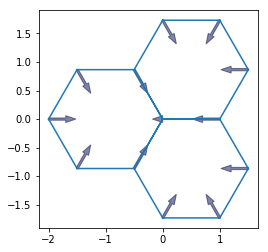

In [2]:
sheet = Sheet('3', *three_faces_sheet())
SheetGeometry.update_all(sheet)
sheet.settings['threshold_length'] = 1e-3

sheet.update_specs(config.dynamics.quasistatic_plane_spec())
sheet.face_df["prefered_area"] = sheet.face_df["area"].mean()
history = History(sheet)

fig, ax = plot_forces(sheet, SheetGeometry, PlanarModel, ['x', 'y'], 1)
#

In [3]:
solver = ViscousSolver(sheet, geom, model, with_t1=True, with_t3=True)

In [4]:
sheet.vert_df['viscosity'] = 2.0
#sheet.face_df.loc[0, 'prefered_area'] *= 2
sheet.edge_df.loc[[0, 17],  'line_tension'] *= 4

In [5]:
res = solver.solve(10, method="RK23")

$\eta v  = \sum F$

In [6]:
create_gif(solver.history, "sheet3.gif")

![](sheet3.gif)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0f0fb1c940>)

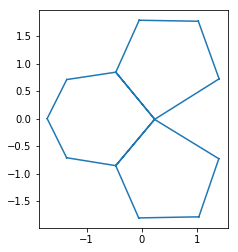

In [7]:
sheet_view(sheet, mode="quick")